In [187]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from sklearn import metrics as mt

In [188]:
crime = pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [189]:
print(crime.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_subset = pd.DataFrame(scaler.fit_transform(crime.iloc[:,1:]))
crime_subset    

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


# applying hierarchail clustering method

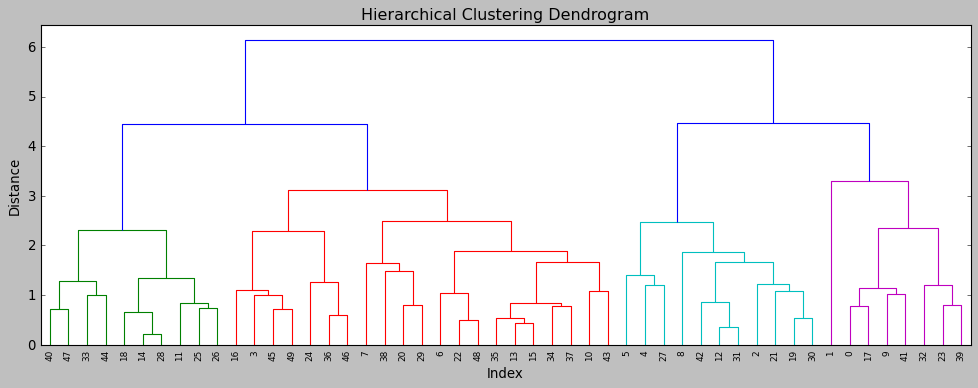

In [191]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(crime_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()       

In [192]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(crime_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust_h']=cluster_labels # creating a  new column and assigning it to new column 
crime  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_h
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [193]:
crime.iloc[:,1:].groupby(crime.clust_h).mean()   

,Murder,Assault,UrbanPop,Rape,clust_h
clust_h,,,,,
0,14.087500,252.750000,53.500000,24.537500,0.0
1,5.871429,134.476190,70.761905,18.580952,1.0
2,11.054545,264.090909,79.090909,32.618182,2.0
3,3.180000,78.700000,49.300000,11.630000,3.0


In [194]:
crime.clust_h.value_counts()

1    21
2    11
3    10
0     8
Name: clust_h, dtype: int64

In [195]:
data = crime[(crime.clust_h==0)]
data 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_h
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [196]:
data1 = crime[(crime.clust_h==1)]
data1 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_h
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
24,Missouri,9.0,178,70,28.2,1


In [197]:
data2 = crime[(crime.clust_h==2)]
data2 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_h
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
27,Nevada,12.2,252,81,46.0,2
30,New Mexico,11.4,285,70,32.1,2
31,New York,11.1,254,86,26.1,2


In [198]:
data3 = crime[(crime.clust_h==3)]
data3 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_h
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3


Text(0.5, 1.0, 'Clusters using hierarchial')

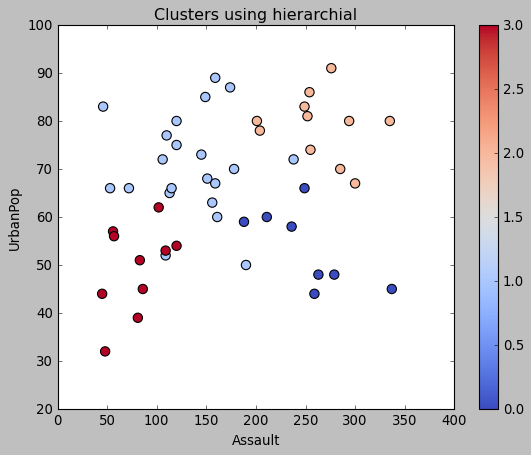

In [200]:
crime.plot(x="Assault",y ="UrbanPop",c=cluster_labels,kind="scatter",s=70 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using hierarchial') 

In [201]:
## we can see above are 4 cluster groups based on hierarchial clustering

# applying K means clustering method

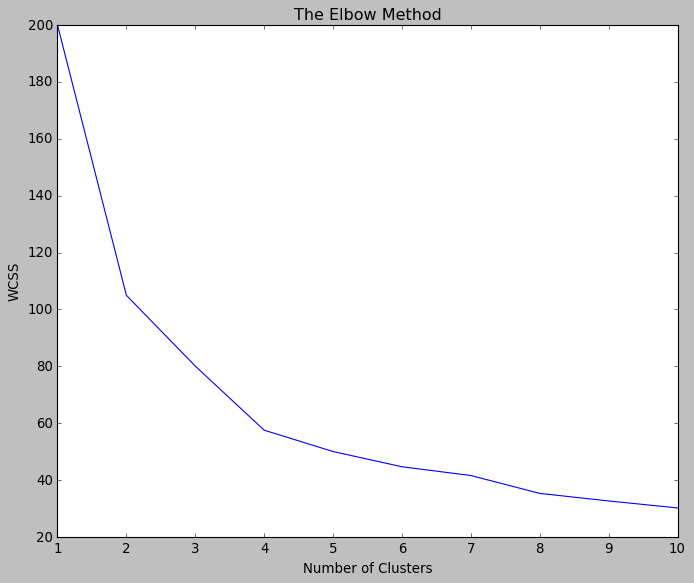

In [202]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(crime_subset)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [203]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(crime_subset)  

In [204]:
clf.labels_ 

array([0, 3, 3, 0, 3, 3, 2, 2, 3, 0, 2, 1, 3, 2, 1, 2, 1, 0, 1, 3, 2, 3,
       1, 0, 3, 1, 1, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 3, 2,
       1, 2, 2, 1, 1, 2])

In [205]:
y_kmeans 

array([0, 3, 3, 0, 3, 3, 2, 2, 3, 0, 2, 1, 3, 2, 1, 2, 1, 0, 1, 3, 2, 3,
       1, 0, 3, 1, 1, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 3, 2,
       1, 2, 2, 1, 1, 2])

In [206]:
clf.cluster_centers_ 

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [207]:
clf.inertia_

57.55425863091104

In [208]:
kc=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime['clust_k']=kc # creating a  new column and assigning it to new column 
crime 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_h,clust_k
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,3
2,Arizona,8.1,294,80,31.0,2,3
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,2,3
5,Colorado,7.9,204,78,38.7,2,3
6,Connecticut,3.3,110,77,11.1,1,2
7,Delaware,5.9,238,72,15.8,1,2
8,Florida,15.4,335,80,31.9,2,3
9,Georgia,17.4,211,60,25.8,0,0


In [209]:
crime.sort_values("clust_k")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_h,clust_k
0,Alabama,13.2,236,58,21.2,0,0
3,Arkansas,8.8,190,50,19.5,1,0
23,Mississippi,16.1,259,44,17.1,0,0
41,Tennessee,13.2,188,59,26.9,0,0
9,Georgia,17.4,211,60,25.8,0,0
39,South Carolina,14.4,279,48,22.5,0,0
17,Louisiana,15.4,249,66,22.2,0,0
32,North Carolina,13.0,337,45,16.1,0,0
26,Nebraska,4.3,102,62,16.5,3,1
25,Montana,6.0,109,53,16.4,3,1


In [210]:
crime.clust_k.value_counts()

2    16
3    13
1    13
0     8
Name: clust_k, dtype: int64

In [211]:
crime.iloc[:,1:5].groupby(crime.clust_k).mean()  

,Murder,Assault,UrbanPop,Rape
clust_k,,,,
0,13.937500,243.625000,53.750000,21.412500
1,3.600000,78.538462,52.076923,12.176923
2,5.656250,138.875000,73.875000,18.781250
3,10.815385,257.384615,76.000000,33.192308


In [212]:
import matplotlib.pyplot as plt
plt.style.use('classic')   

Text(0.5, 1.0, 'Clusters using KMeans')

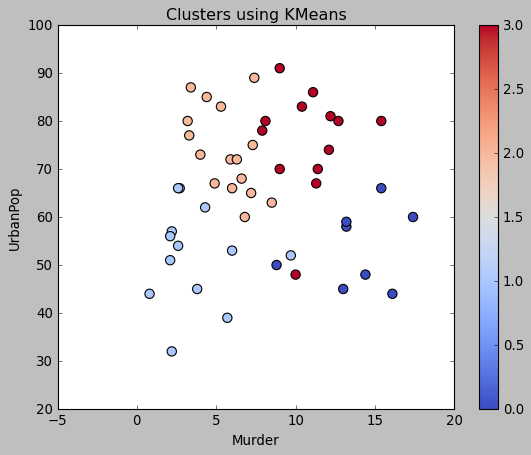

In [213]:
crime.plot(x="Murder",y ="UrbanPop",c=clf.labels_,kind="scatter",s=70 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

Text(0.5, 1.0, 'Clusters using KMeans')

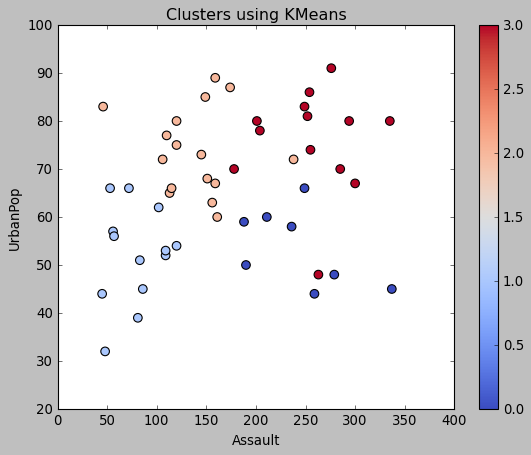

In [214]:
crime.plot(x="Assault",y ="UrbanPop",c=clf.labels_,kind="scatter",s=60 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [215]:
mt.silhouette_score(crime_subset, y_kmeans)

0.33968891433344395

In [216]:
##we can see above are 4 cluster groups based on k means clustering

# Clustering with DB Scan method

In [217]:
df1 = crime.iloc[:,1:5]
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [218]:
array=df1.values


In [219]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [220]:
from sklearn.neighbors import NearestNeighbors  

In [221]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

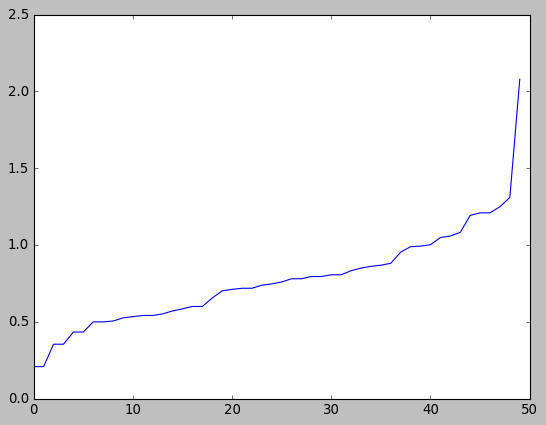

In [222]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  

In [223]:
dbscan = DBSCAN(eps=1.25,min_samples=5)
dbscan.fit(X) 

DBSCAN(eps=1.25)

In [224]:
#Noisy samples are given the label -1.
dbscan.labels_  

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [225]:
df1["label"]=dbscan.labels_
df1

,Murder,Assault,UrbanPop,Rape,label
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


In [226]:
df1.sort_values("label")

,Murder,Assault,UrbanPop,Rape,label
1,10.0,263,48,44.5,-1
32,13.0,337,45,16.1,-1
27,12.2,252,81,46.0,-1
4,9.0,276,91,40.6,-1
23,16.1,259,44,17.1,-1
8,15.4,335,80,31.9,-1
0,13.2,236,58,21.2,0
9,17.4,211,60,25.8,0
17,15.4,249,66,22.2,0
39,14.4,279,48,22.5,0


In [227]:
cl=pd.DataFrame(dbscan.labels_,columns=['clust_dbscan'])  

In [228]:
cl

,clust_dbscan
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [229]:
import matplotlib.pyplot as plt
plt.style.use('classic')   

Text(0.5, 1.0, 'Clusters using DBScan')

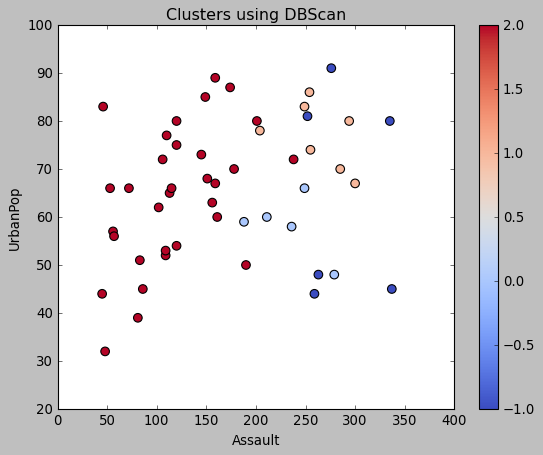

In [230]:
crime.plot(x="Assault",y ="UrbanPop",c=dbscan.labels_ ,kind="scatter",s=60 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DBScan') 

In [231]:
## We can see above are 3 cluster groups based on DB scan method.

In [232]:
dl = dbscan.labels_ 


In [233]:

mt.silhouette_score(X, dl) 

0.23869670053300918

In [234]:
crime1 = pd.concat([crime,cl],axis=1)  
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_h,clust_k,clust_dbscan
0,Alabama,13.2,236,58,21.2,0,0,0
1,Alaska,10.0,263,48,44.5,0,3,-1
2,Arizona,8.1,294,80,31.0,2,3,1
3,Arkansas,8.8,190,50,19.5,1,0,2
4,California,9.0,276,91,40.6,2,3,-1
5,Colorado,7.9,204,78,38.7,2,3,1
6,Connecticut,3.3,110,77,11.1,1,2,2
7,Delaware,5.9,238,72,15.8,1,2,2
8,Florida,15.4,335,80,31.9,2,3,-1
9,Georgia,17.4,211,60,25.8,0,0,0
